In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
file_path = r"/Users/elvisechefu/Desktop/all scraps/Nutrition-Summary-2023-09-18-to-2023-11-24.csv"
df = pd.read_csv("/Users/elvisechefu/Desktop/all scraps/Nutrition-Summary-2023-09-18-to-2023-11-24.csv")
df.head(5)

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2023-09-20,Breakfast,421.5,13.7,2.7,0.1,0.0,0.0,0.0,38.3,422.4,62.0,5.4,20.9,16.5,5.0,17.1,0.6,1.7,NaN
1,2023-09-20,Dinner,767.0,27.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,0.0,0.0,50.6,0.0,0.0,0.0,0.0,NaN
2,2023-09-20,Lunch,1183.0,54.6,5.4,11.0,0.0,0.0,0.0,0.6,0.0,129.6,12.8,13.5,47.8,0.0,0.0,0.0,0.0,NaN
3,2023-09-20,Snacks,1242.8,67.5,14.0,0.0,0.0,0.3,12.2,128.0,684.4,73.9,6.6,27.3,91.3,0.0,116.2,316.0,15.1,NaN
4,2023-09-21,Breakfast,374.5,12.4,2.0,0.0,0.0,0.0,0.0,36.8,0.0,55.2,3.9,6.0,14.3,0.0,0.0,0.0,0.0,NaN


In [13]:
# Define the category you want to filter by
desired_category = 'Snacks'

# Filter the data based on the desired category
fd_s = df[df['Meal'] == desired_category]

# Display the filtered data
#print(fd_s)

# Define the category you want to filter by
desired_category = 'Breakfast'

# Filter the data based on the desired category
fd_b = df[df['Meal'] == desired_category]

# Display the filtered data
#print(fd_b)

# Define the category you want to filter by
desired_category = 'Lunch'

# Filter the data based on the desired category
fd_l = df[df['Meal'] == desired_category]

# Display the filtered data
#print(fd_l)

# Define the category you want to filter by
desired_category = 'Dinner'

# Filter the data based on the desired category
fd_d = df[df['Meal'] == desired_category]

# Display the filtered data
#print(fd_d)


In [14]:
cal_s = fd_s['Calories']
#cal_s

cal_b = fd_b['Calories']
#cal_b

cal_l = fd_l['Calories']
#cal_l

cal_d = fd_d['Calories']
#cal_d


In [15]:
prot_s = fd_s['Protein (g)']
#prot_s

prot_b = fd_b['Protein (g)']
#prot_b

prot_l = fd_l['Protein (g)']
#prot_l

prot_d = fd_d['Protein (g)']
#prot_d


In [16]:
carb_s = fd_s['Carbohydrates (g)']
#carb_s

carb_b = fd_b['Carbohydrates (g)']
#crb_b

carb_l = fd_l['Carbohydrates (g)']
#carb_l

carb_d = fd_d['Carbohydrates (g)']
#carb_d


In [17]:
fat_s = fd_s['Fat (g)']
#fat_s

fat_b = fd_b['Fat (g)']
#fat_b

fat_l = fd_l['Fat (g)']
#fat_l

fat_d = fd_d['Fat (g)']
#fat_d


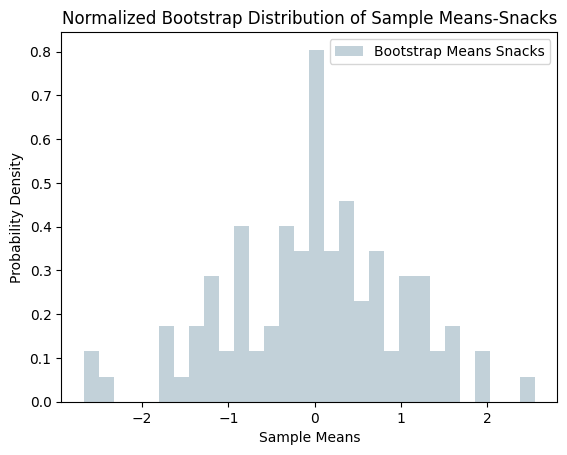

In [18]:
def perform_bootstrap(cal_s, num_samples=100):
    sample_size_s = len(cal_s)
    bootstrap_means_s = []

    for _ in range(num_samples):
        resampled_data_s = np.random.choice(cal_s, size=sample_size_s, replace=True)
        resampled_mean_s = np.mean(resampled_data_s)
        bootstrap_means_s.append(resampled_mean_s)

    return bootstrap_means_s

def plot_bootstrap_distribution(bootstrap_means_s):
    mean_value_s = np.mean(bootstrap_means_s)
    std_value_s = np.std(bootstrap_means_s)
    normalized_bootstrap_s = (bootstrap_means_s - mean_value_s) / std_value_s

    plt.hist(normalized_bootstrap_s, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means Snacks')

    plt.xlabel('Sample Means')
    plt.ylabel('Probability Density')
    plt.title('Normalized Bootstrap Distribution of Sample Means-Snacks')
    plt.legend()
    plt.show()

# Call the functions
bootstrap_means_s = perform_bootstrap(cal_s)
plot_bootstrap_distribution(bootstrap_means_s)


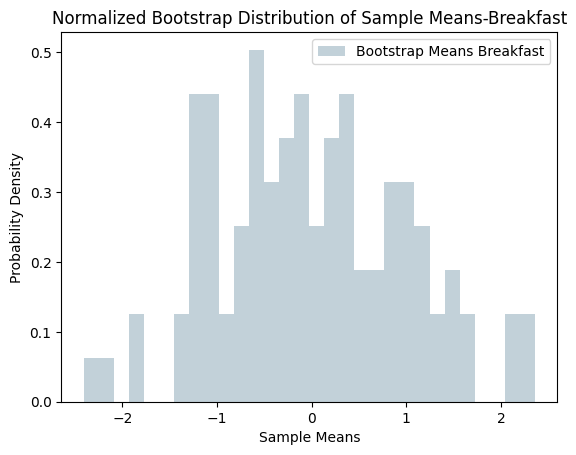

In [19]:
def perform_bootstrap(cal_b, num_samples=100):
    sample_size_b = len(cal_b)
    bootstrap_means_b = []

    for _ in range(num_samples):
        resampled_data_b = np.random.choice(cal_b, size=sample_size_b, replace=True)
        resampled_mean_b = np.mean(resampled_data_b)
        bootstrap_means_b.append(resampled_mean_b)

    return bootstrap_means_b

def plot_bootstrap_distribution(bootstrap_means_b):
    mean_value_b = np.mean(bootstrap_means_b)
    std_value_b = np.std(bootstrap_means_b)
    normalized_bootstrap_b = (bootstrap_means_b - mean_value_b) / std_value_b

    plt.hist(normalized_bootstrap_b, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means Breakfast')

    plt.xlabel('Sample Means')
    plt.ylabel('Probability Density')
    plt.title('Normalized Bootstrap Distribution of Sample Means-Breakfast')
    plt.legend()
    plt.show()

# Call the functions
bootstrap_means_b = perform_bootstrap(cal_b)
plot_bootstrap_distribution(bootstrap_means_b)


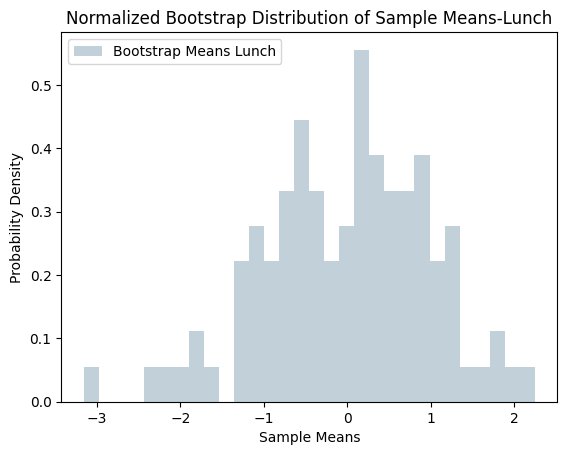

In [20]:
def perform_bootstrap(cal_l, num_samples=100):
    sample_size_l = len(cal_l)
    bootstrap_means_l = []

    for _ in range(num_samples):
        resampled_data_l = np.random.choice(cal_l, size=sample_size_l, replace=True)
        resampled_mean_l = np.mean(resampled_data_l)
        bootstrap_means_l.append(resampled_mean_l)

    return bootstrap_means_l

def plot_bootstrap_distribution(bootstrap_means_l):
    mean_value_l = np.mean(bootstrap_means_l)
    std_value_l = np.std(bootstrap_means_l)
    normalized_bootstrap_l = (bootstrap_means_l - mean_value_l) / std_value_l

    plt.hist(normalized_bootstrap_l, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means Lunch')

    plt.xlabel('Sample Means')
    plt.ylabel('Probability Density')
    plt.title('Normalized Bootstrap Distribution of Sample Means-Lunch')
    plt.legend()
    plt.show()

# Call the functions
bootstrap_means_l = perform_bootstrap(cal_l)
plot_bootstrap_distribution(bootstrap_means_l)

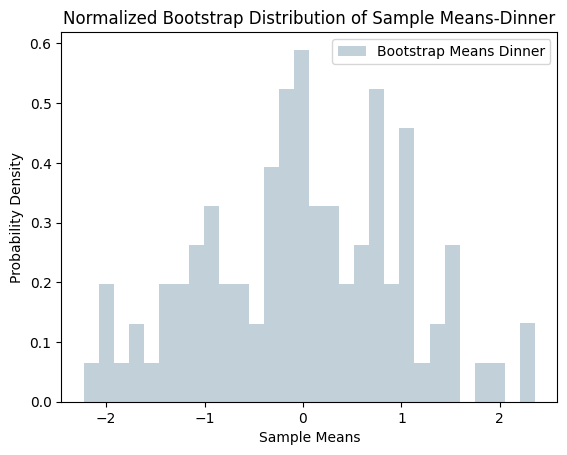

In [21]:
def perform_bootstrap(cal_d, num_samples=100):
    sample_size_d = len(cal_d)
    bootstrap_means_d = []

    for _ in range(num_samples):
        resampled_data_d = np.random.choice(cal_d, size=sample_size_d, replace=True)
        resampled_mean_d = np.mean(resampled_data_d)
        bootstrap_means_d.append(resampled_mean_d)

    return bootstrap_means_d

def plot_bootstrap_distribution(bootstrap_means_d):
    mean_value_d = np.mean(bootstrap_means_d)
    std_value_d = np.std(bootstrap_means_d)
    normalized_bootstrap_d = (bootstrap_means_d - mean_value_d) / std_value_d

    plt.hist(normalized_bootstrap_d, bins=30, density=True, alpha=0.8, color='#b3c6d0', label='Bootstrap Means Dinner')

    plt.xlabel('Sample Means')
    plt.ylabel('Probability Density')
    plt.title('Normalized Bootstrap Distribution of Sample Means-Dinner')
    plt.legend()
    plt.show()

# Call the functions
bootstrap_means_d = perform_bootstrap(cal_d)
plot_bootstrap_distribution(bootstrap_means_d)

In [22]:
correlation_matrix = fd_s.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Snacks')
plt.show()

ValueError: could not convert string to float: '2023-09-20'

Mean value: 950.32
Median value: 914.70
Mode value: 784.68


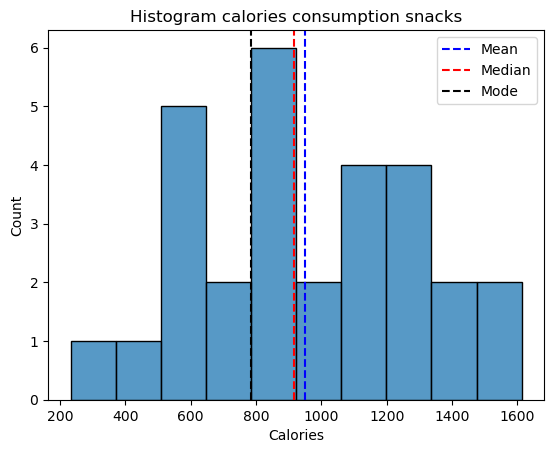

In [ ]:
num_bins = 10

ax1 = sns.histplot(cal_s,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_cal_s = np.mean(cal_s) #calculate mean
med_cal_s = np.median(cal_s) #calculate median
#draw the lines:
ax1.axvline(avg_cal_s, color="b",ls ="--" )
ax1.axvline(med_cal_s, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(cal_s, bins=num_bins)
#find the value for which the count is the maximum:
mode_cal_s = val[np.argmax(count)]
#plot
ax1.axvline(mode_cal_s, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram calories consumption snacks")

print("Mean value: %.2f" % avg_cal_s)
print("Median value: %.2f" % med_cal_s)
print("Mode value: %.2f" % mode_cal_s)


Text(0.5, 1.0, 'Calorie consumption probability snacks')

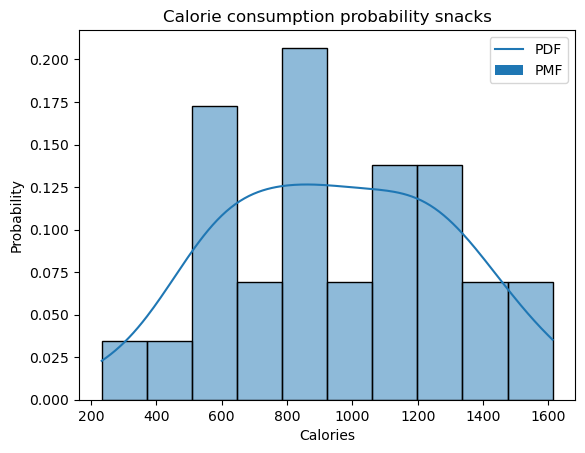

In [ ]:
ax2 = sns.histplot(cal_s,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Calorie consumption probability snacks")

Mean value: 39.63
Median value: 41.10
Mode value: 40.00


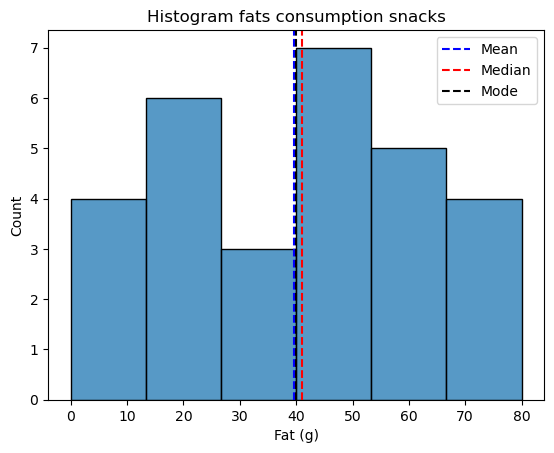

In [ ]:
num_bins =6

ax1 = sns.histplot(fat_s,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fat_s = np.mean(fat_s) #calculate mean
med_fat_s = np.median(fat_s) #calculate median
#draw the lines:
ax1.axvline(avg_fat_s, color="b",ls ="--" )
ax1.axvline(med_fat_s, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(fat_s, bins=num_bins)
#find the value for which the count is the maximum:
mode_fat_s = val[np.argmax(count)]
#plot
ax1.axvline(mode_fat_s, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption snacks")

print("Mean value: %.2f" % avg_fat_s)
print("Median value: %.2f" % med_fat_s)
print("Mode value: %.2f" % mode_fat_s)

Text(0.5, 1.0, 'Fats consumption probability snacks')

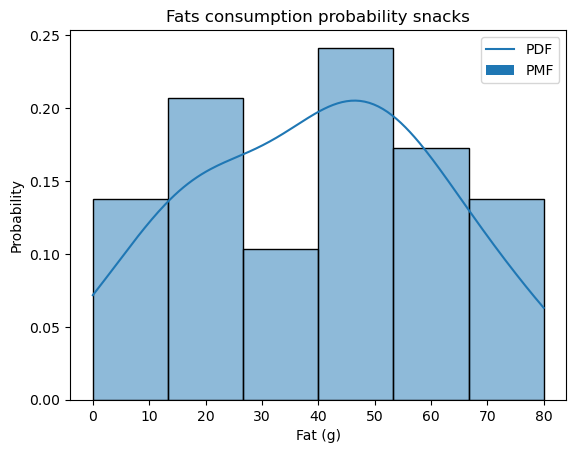

In [ ]:
ax2 = sns.histplot(fat_s,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Fats consumption probability snacks")

Mean value: 74.96
Median value: 72.40
Mode value: 57.96


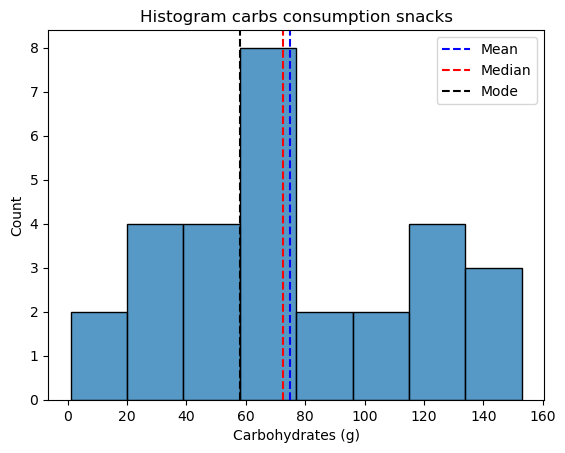

In [ ]:
num_bins = 8

ax1 = sns.histplot(carb_s,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_carbs_s = np.mean(carb_s) #calculate mean
med_carbs_s = np.median(carb_s) #calculate median
#draw the lines:
ax1.axvline(avg_carbs_s, color="b",ls ="--" )
ax1.axvline(med_carbs_s, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(carb_s, bins=num_bins)
#find the value for which the count is the maximum:
mode_carbs_s = val[np.argmax(count)]
#plot
ax1.axvline(mode_carbs_s, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram carbs consumption snacks")

print("Mean value: %.2f" % avg_carbs_s)
print("Median value: %.2f" % med_carbs_s)
print("Mode value: %.2f" % mode_carbs_s)

Text(0.5, 1.0, 'Carbs consumption probability snacks')

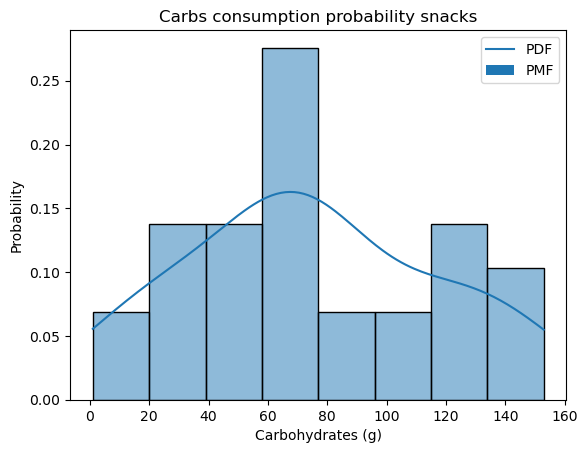

In [ ]:
ax2 = sns.histplot(carb_s,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Carbs consumption probability snacks")

Mean value: 70.45
Median value: 76.30
Mode value: 72.45


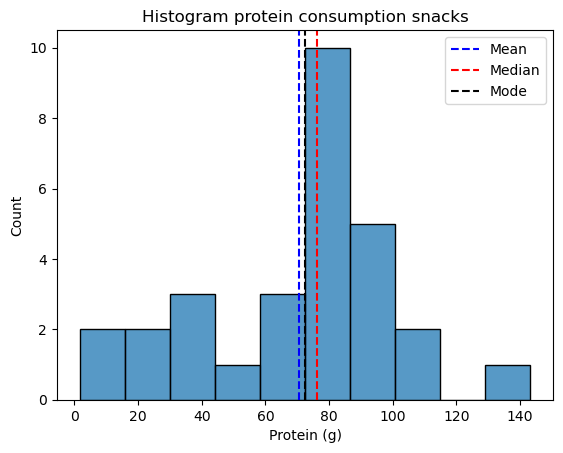

In [ ]:
num_bins = 10

ax1 = sns.histplot(prot_s,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_prot_s = np.mean(prot_s) #calculate mean
med_prot_s = np.median(prot_s) #calculate median
#draw the lines:
ax1.axvline(avg_prot_s, color="b",ls ="--" )
ax1.axvline(med_prot_s, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(prot_s, bins=num_bins)
#find the value for which the count is the maximum:
mode_prot_s = val[np.argmax(count)]
#plot
ax1.axvline(mode_prot_s, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram protein consumption snacks")

print("Mean value: %.2f" % avg_prot_s)
print("Median value: %.2f" % med_prot_s)
print("Mode value: %.2f" % mode_prot_s)

Text(0.5, 1.0, 'Protein consumption probability snacks')

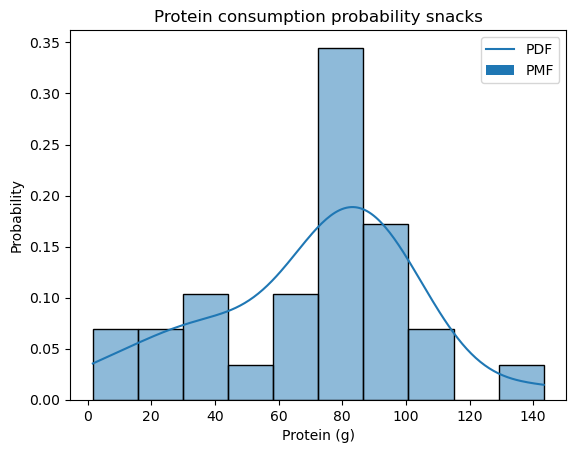

In [ ]:
ax2 = sns.histplot(prot_s,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Protein consumption probability snacks")

/var/folders/8z/5ghhcb757ts2cfk0prz1d85c0000gn/T/ipykernel_4740/2029756335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fd_b.corr()


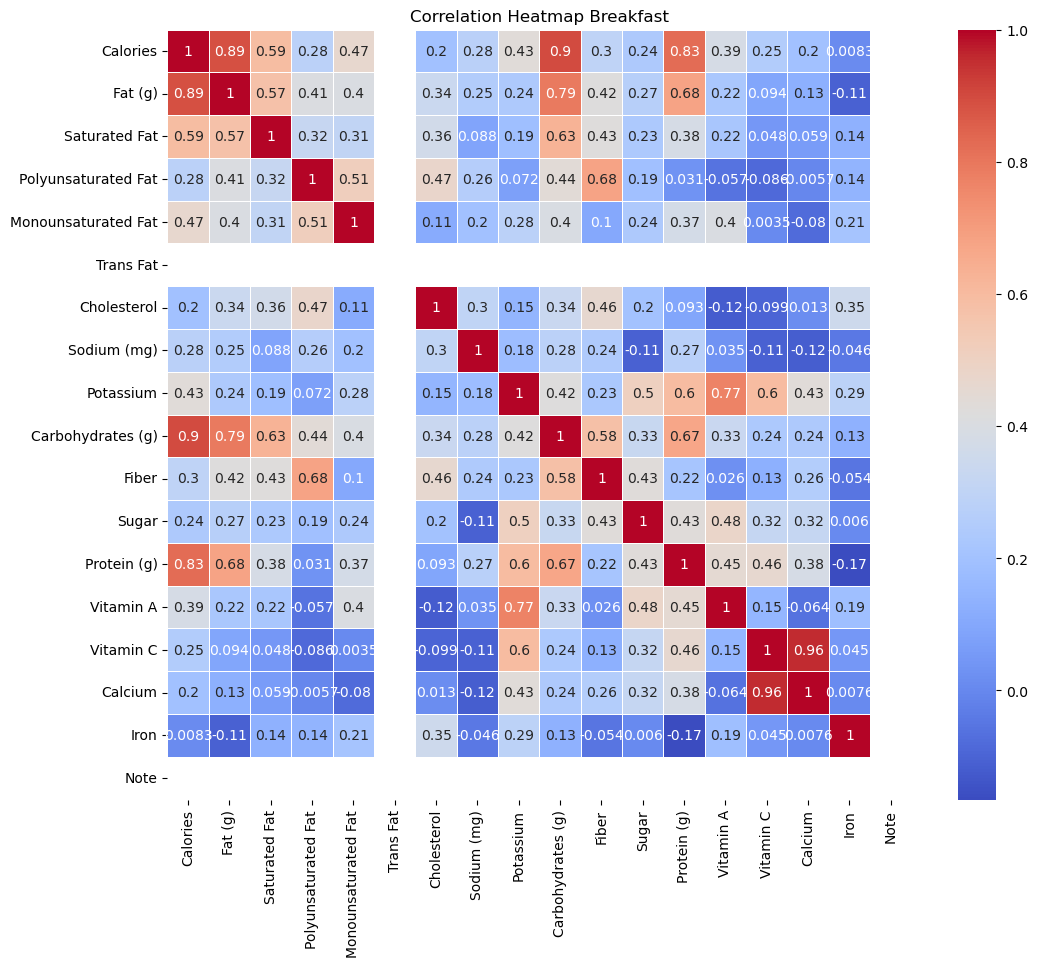

In [ ]:
correlation_matrix = fd_b.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Breakfast')
plt.show()

Mean value: 397.36
Median value: 372.00
Mode value: 117.60


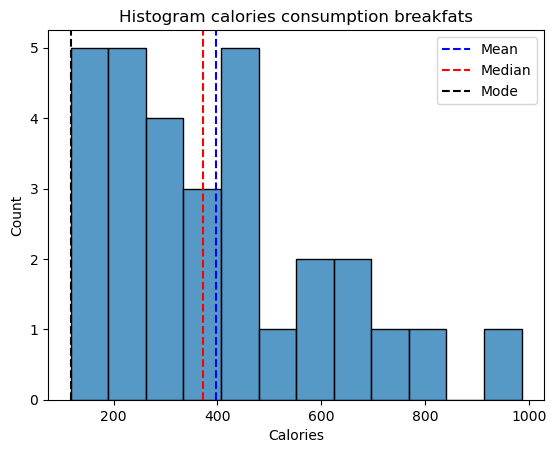

In [ ]:
num_bins =12

ax1 = sns.histplot(cal_b,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_cal_b = np.mean(cal_b) #calculate mean
med_cal_b = np.median(cal_b) #calculate median
#draw the lines:
ax1.axvline(avg_cal_b, color="b",ls ="--" )
ax1.axvline(med_cal_b, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(cal_b, bins=num_bins)
#find the value for which the count is the maximum:
mode_cal_b = val[np.argmax(count)]
#plot
ax1.axvline(mode_cal_b, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram calories consumption breakfats")

print("Mean value: %.2f" % avg_cal_b)
print("Median value: %.2f" % med_cal_b)
print("Mode value: %.2f" % mode_cal_b)


Text(0.5, 1.0, 'Calorie consumption probability breakfast')

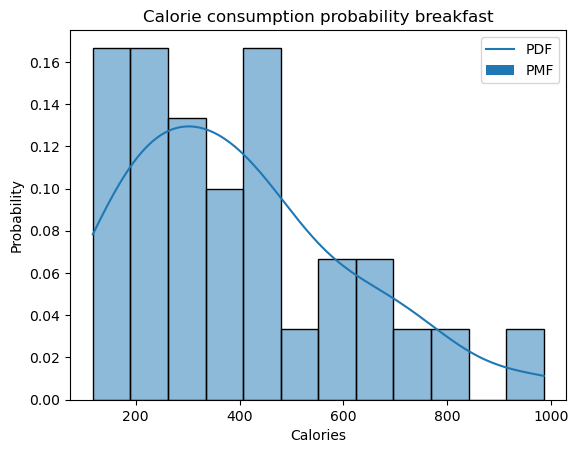

In [ ]:
ax2 = sns.histplot(cal_b,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Calorie consumption probability breakfast")

Mean value: 12.91
Median value: 12.70
Mode value: 0.00


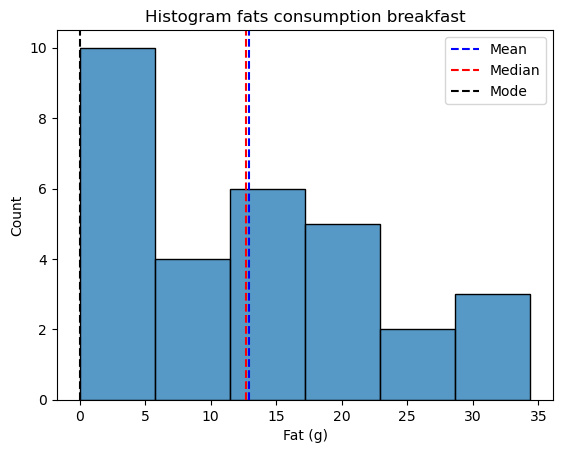

In [ ]:
num_bins =6

ax1 = sns.histplot(fat_b,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fat_b = np.mean(fat_b) #calculate mean
med_fat_b = np.median(fat_b) #calculate median
#draw the lines:
ax1.axvline(avg_fat_b, color="b",ls ="--" )
ax1.axvline(med_fat_b, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(fat_b, bins=num_bins)
#find the value for which the count is the maximum:
mode_fat_b = val[np.argmax(count)]
#plot
ax1.axvline(mode_fat_b, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption breakfast")

print("Mean value: %.2f" % avg_fat_b)
print("Median value: %.2f" % med_fat_b)
print("Mode value: %.2f" % mode_fat_b)

Text(0.5, 1.0, 'Fats consumption probability snacks')

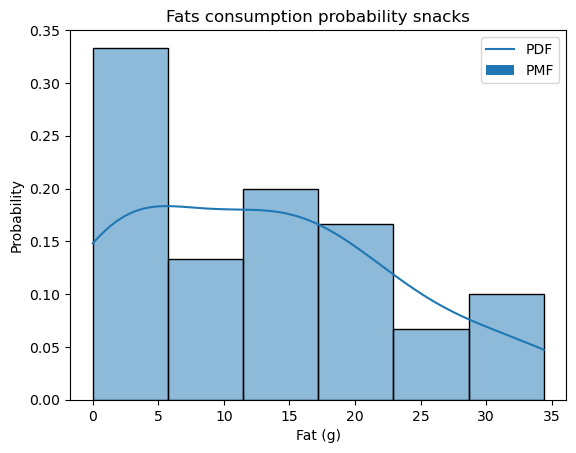

In [ ]:
ax2 = sns.histplot(fat_b,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Fats consumption probability snacks")

Mean value: 59.32
Median value: 54.30
Mode value: 44.05


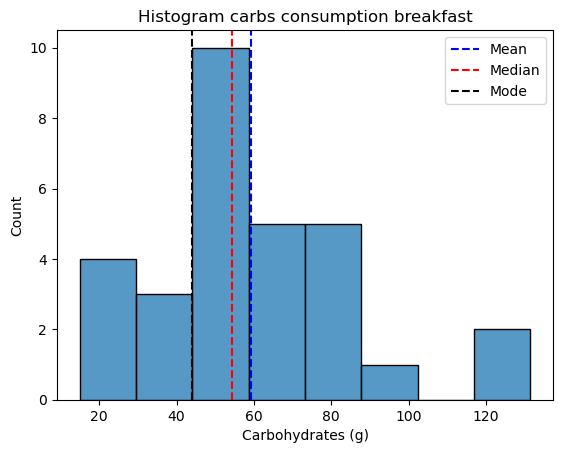

In [ ]:
num_bins = 8

ax1 = sns.histplot(carb_b,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_carbs_b = np.mean(carb_b) #calculate mean
med_carbs_b = np.median(carb_b) #calculate median
#draw the lines:
ax1.axvline(avg_carbs_b, color="b",ls ="--" )
ax1.axvline(med_carbs_b, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(carb_b, bins=num_bins)
#find the value for which the count is the maximum:
mode_carbs_b = val[np.argmax(count)]
#plot
ax1.axvline(mode_carbs_b, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram carbs consumption breakfast")

print("Mean value: %.2f" % avg_carbs_b)
print("Median value: %.2f" % med_carbs_b)
print("Mode value: %.2f" % mode_carbs_b)

Text(0.5, 1.0, 'Carbs consumption probability breakfast')

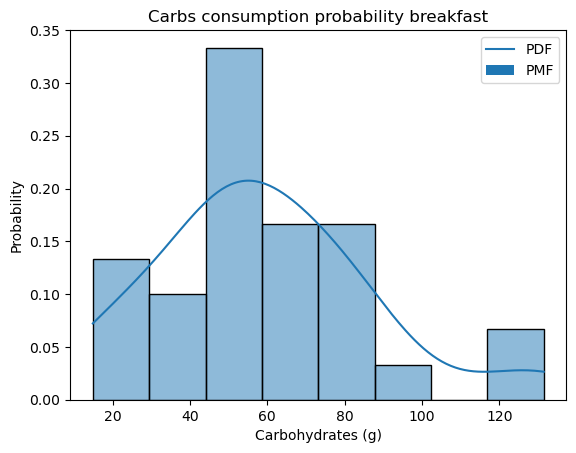

In [ ]:
ax2 = sns.histplot(carb_b,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Carbs consumption probability breakfast")

Mean value: 17.00
Median value: 14.30
Mode value: 12.47


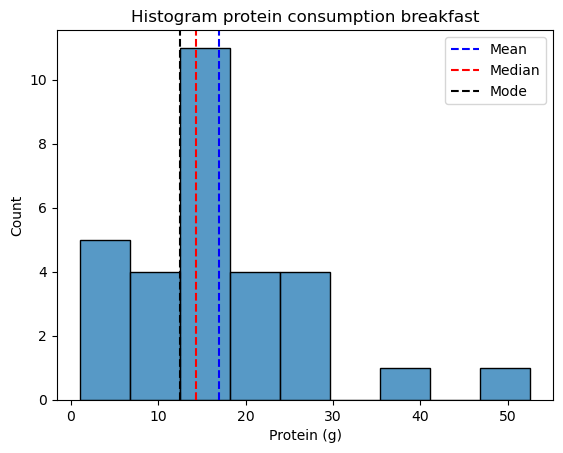

In [ ]:
num_bins = 9

ax1 = sns.histplot(prot_b,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_prot_b = np.mean(prot_b) #calculate mean
med_prot_b = np.median(prot_b) #calculate median
#draw the lines:
ax1.axvline(avg_prot_b, color="b",ls ="--" )
ax1.axvline(med_prot_b, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(prot_b, bins=num_bins)
#find the value for which the count is the maximum:
mode_prot_b = val[np.argmax(count)]
#plot
ax1.axvline(mode_prot_b, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram protein consumption breakfast")

print("Mean value: %.2f" % avg_prot_b)
print("Median value: %.2f" % med_prot_b)
print("Mode value: %.2f" % mode_prot_b)

Text(0.5, 1.0, 'Protein consumption probability breakfast')

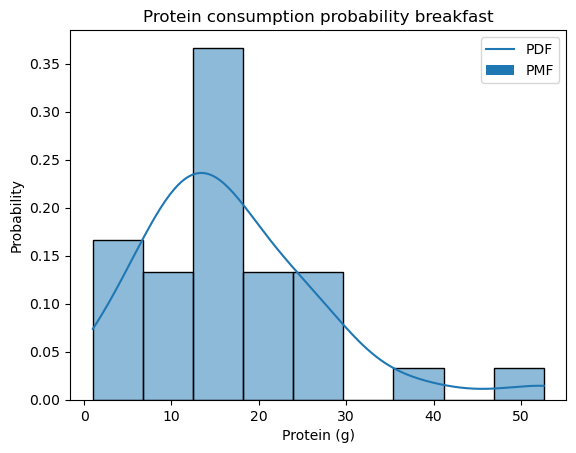

In [ ]:
ax2 = sns.histplot(prot_b,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Protein consumption probability breakfast")

/var/folders/8z/5ghhcb757ts2cfk0prz1d85c0000gn/T/ipykernel_4740/3709736269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = fd_l.corr()


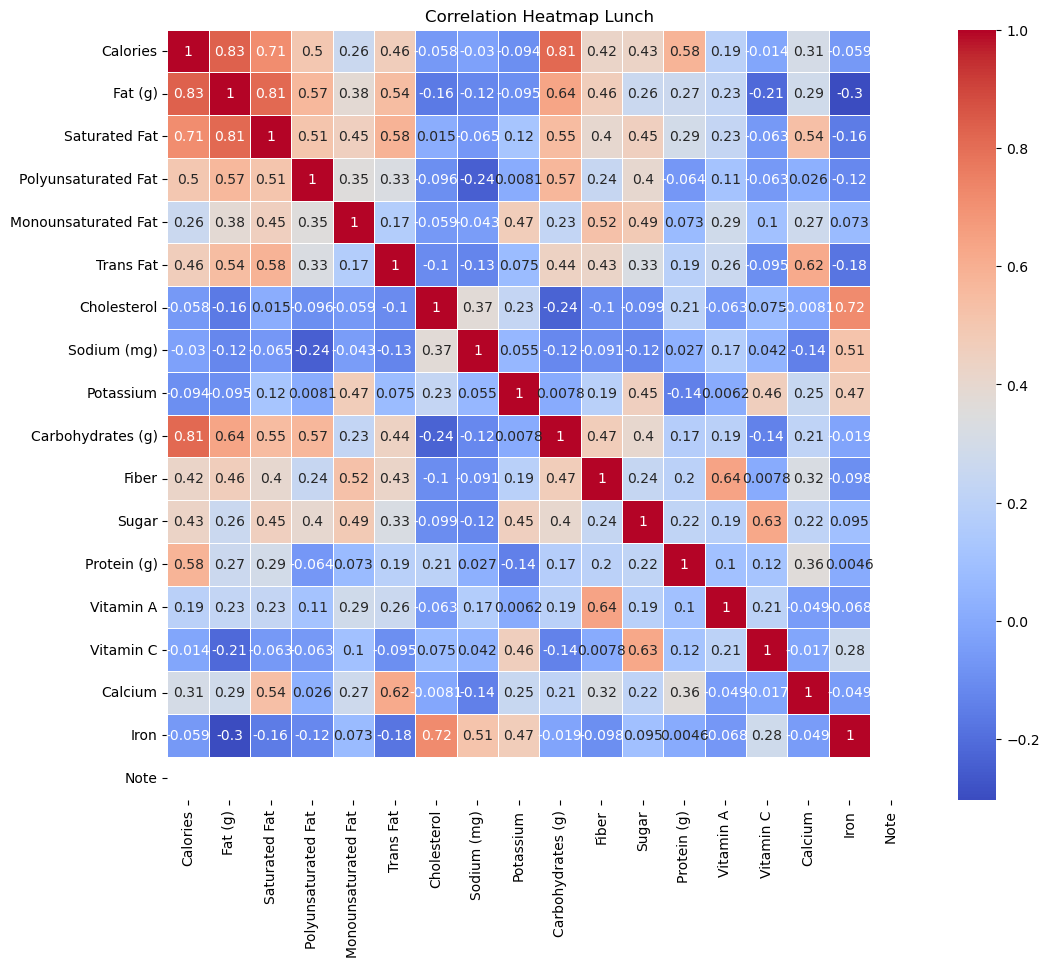

In [ ]:
correlation_matrix = fd_l.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Lunch')
plt.show()

Mean value: 984.34
Median value: 1007.85
Mode value: 1291.72


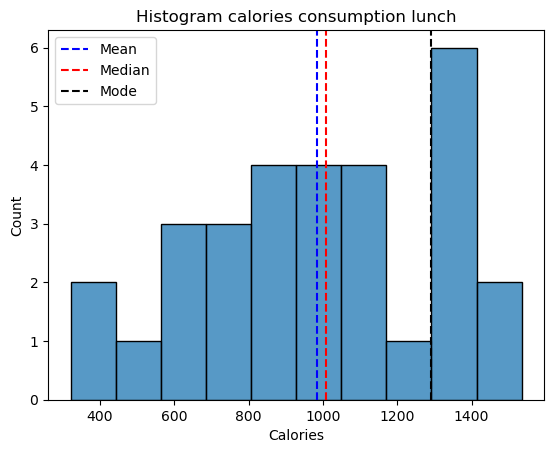

In [ ]:
num_bins = 10

ax1 = sns.histplot(cal_l,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_cal_l = np.mean(cal_l) #calculate mean
med_cal_l = np.median(cal_l) #calculate median
#draw the lines:
ax1.axvline(avg_cal_l, color="b",ls ="--" )
ax1.axvline(med_cal_l, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(cal_l, bins=num_bins)
#find the value for which the count is the maximum:
mode_cal_l = val[np.argmax(count)]
#plot
ax1.axvline(mode_cal_l, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram calories consumption lunch")

print("Mean value: %.2f" % avg_cal_l)
print("Median value: %.2f" % med_cal_l)
print("Mode value: %.2f" % mode_cal_l)


Text(0.5, 1.0, 'Calorie consumption probability lunch')

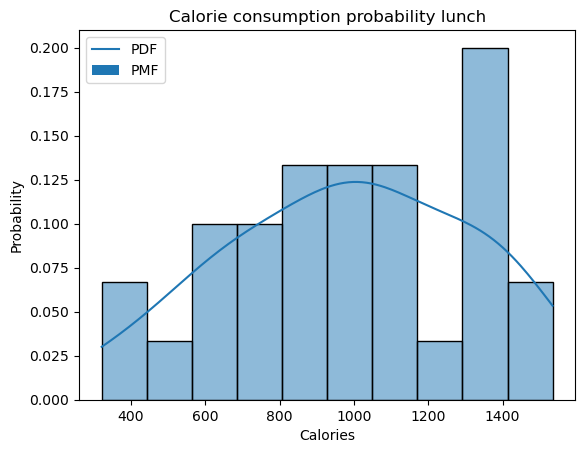

In [ ]:
ax2 = sns.histplot(cal_l,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Calorie consumption probability lunch")

Mean value: 39.72
Median value: 38.50
Mode value: 24.12


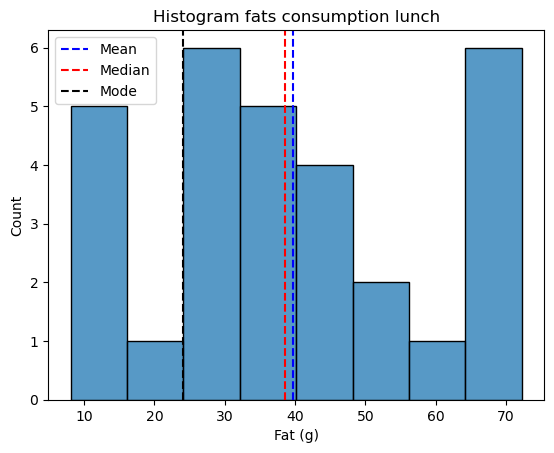

In [ ]:
num_bins =8

ax1 = sns.histplot(fat_l,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fat_l = np.mean(fat_l) #calculate mean
med_fat_l = np.median(fat_l) #calculate median
#draw the lines:
ax1.axvline(avg_fat_l, color="b",ls ="--" )
ax1.axvline(med_fat_l, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(fat_l, bins=num_bins)
#find the value for which the count is the maximum:
mode_fat_l = val[np.argmax(count)]
#plot
ax1.axvline(mode_fat_l, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption lunch")

print("Mean value: %.2f" % avg_fat_l)
print("Median value: %.2f" % med_fat_l)
print("Mode value: %.2f" % mode_fat_l)

Text(0.5, 1.0, 'Fats consumption probability lunch')

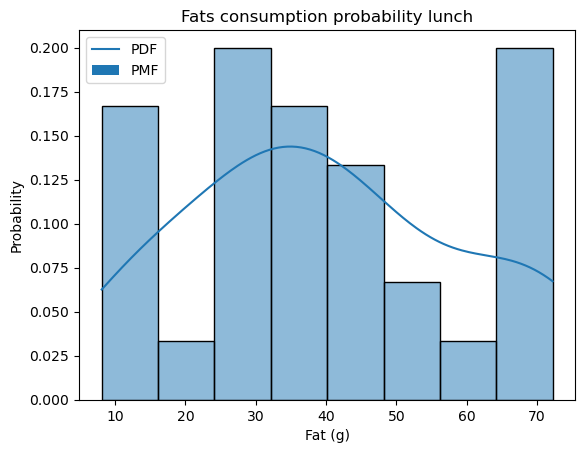

In [ ]:
ax2 = sns.histplot(fat_l,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Fats consumption probability lunch")

Mean value: 108.85
Median value: 98.30
Mode value: 84.43


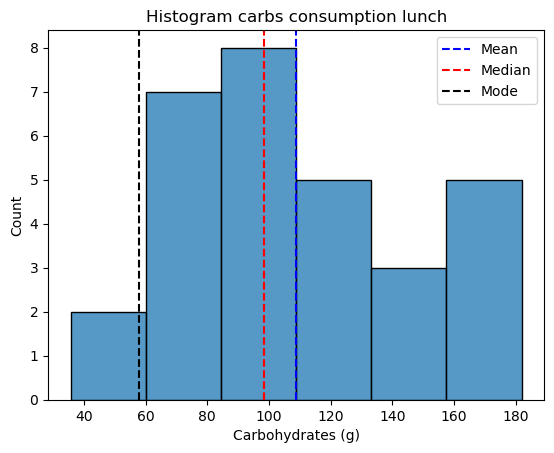

In [ ]:
num_bins = 6

ax1 = sns.histplot(carb_l,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_carbs_l = np.mean(carb_l) #calculate mean
med_carbs_l = np.median(carb_l) #calculate median
#draw the lines:
ax1.axvline(avg_carbs_l, color="b",ls ="--" )
ax1.axvline(med_carbs_l, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(carb_l, bins=num_bins)
#find the value for which the count is the maximum:
mode_carbs_l = val[np.argmax(count)]
#plot
ax1.axvline(mode_carbs_s, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram carbs consumption lunch")

print("Mean value: %.2f" % avg_carbs_l)
print("Median value: %.2f" % med_carbs_l)
print("Mode value: %.2f" % mode_carbs_l)

Text(0.5, 1.0, 'Carbs consumption probability lunch')

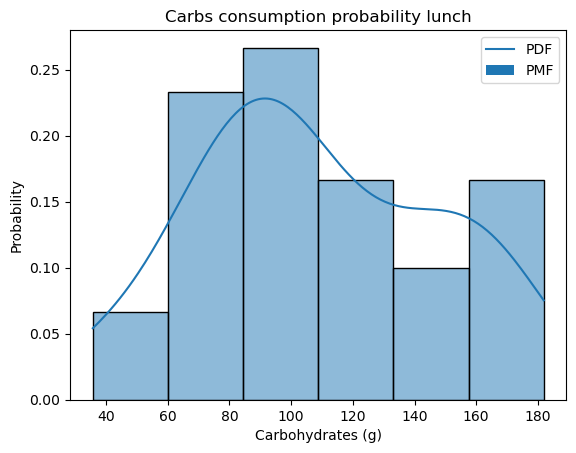

In [ ]:
ax2 = sns.histplot(carb_l,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Carbs consumption probability lunch")

NameError: name 'mode_prot_l' is not defined

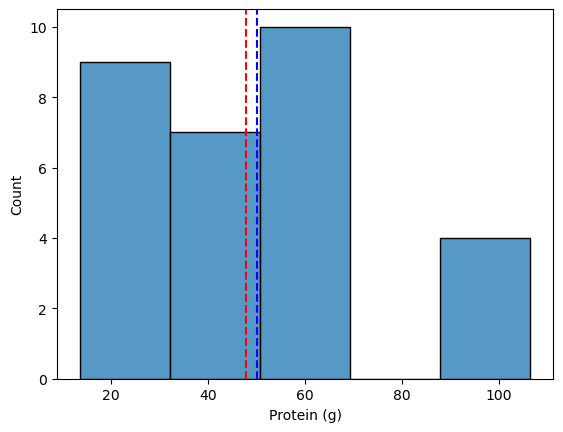

In [ ]:
num_bins = 5

ax1 = sns.histplot(prot_l,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_prot_l = np.mean(prot_l) #calculate mean
med_prot_l = np.median(prot_l) #calculate median
#draw the lines:
ax1.axvline(avg_prot_l, color="b",ls ="--" )
ax1.axvline(med_prot_l, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(prot_l, bins=num_bins)
#find the value for which the count is the maximum:
mode_prot_b = val[np.argmax(count)]
#plot
ax1.axvline(mode_prot_l, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram protein consumption lunch")

print("Mean value: %.2f" % avg_prot_l)
print("Median value: %.2f" % med_prot_l)
print("Mode value: %.2f" % mode_prot_l)

In [ ]:
ax2 = sns.histplot(prot_l,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Protein consumption probability lunch")

In [ ]:
correlation_matrix = fd_d.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Dinner')
plt.show()

In [ ]:
num_bins = 8

ax1 = sns.histplot(cal_d,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_cal_d = np.mean(cal_d) #calculate mean
med_cal_d = np.median(cal_d) #calculate median
#draw the lines:
ax1.axvline(avg_cal_d, color="b",ls ="--" )
ax1.axvline(med_cal_d, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(cal_d, bins=num_bins)
#find the value for which the count is the maximum:
mode_cal_d = val[np.argmax(count)]
#plot
ax1.axvline(mode_cal_d, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram calories consumption dinner")

print("Mean value: %.2f" % avg_cal_d)
print("Median value: %.2f" % med_cal_d)
print("Mode value: %.2f" % mode_cal_d)


In [ ]:
ax2 = sns.histplot(cal_d,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Calorie consumption probability dinner")

In [ ]:
num_bins =9

ax1 = sns.histplot(fat_d,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_fat_d = np.mean(fat_d) #calculate mean
med_fat_d = np.median(fat_d) #calculate median
#draw the lines:
ax1.axvline(avg_fat_d, color="b",ls ="--" )
ax1.axvline(med_fat_d, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(fat_d, bins=num_bins)
#find the value for which the count is the maximum:
mode_fat_d = val[np.argmax(count)]
#plot
ax1.axvline(mode_fat_d, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram fats consumption dinner")

print("Mean value: %.2f" % avg_fat_d)
print("Median value: %.2f" % med_fat_d)
print("Mode value: %.2f" % mode_fat_d)

In [ ]:
ax2 = sns.histplot(fat_d,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Fats consumption probability dinner")

In [ ]:
num_bins = 9

ax1 = sns.histplot(carb_d,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_carbs_d = np.mean(carb_d) #calculate mean
med_carbs_d = np.median(carb_d) #calculate median
#draw the lines:
ax1.axvline(avg_carbs_d, color="b",ls ="--" )
ax1.axvline(med_carbs_d, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(carb_d, bins=num_bins)
#find the value for which the count is the maximum:
mode_carbs_d = val[np.argmax(count)]
#plot
ax1.axvline(mode_carbs_d, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram carbs consumption dinner")

print("Mean value: %.2f" % avg_carbs_d)
print("Median value: %.2f" % med_carbs_d)
print("Mode value: %.2f" % mode_carbs_d)

In [ ]:
ax2 = sns.histplot(carb_d,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Carbs consumption probability dinner")

In [ ]:
num_bins = 7

ax1 = sns.histplot(prot_d,bins=num_bins,legend=True)
# visualize the mean, median and mode:
avg_prot_d = np.mean(prot_d) #calculate mean
med_prot_d = np.median(prot_d) #calculate median
#draw the lines:
ax1.axvline(avg_prot_d, color="b",ls ="--" )
ax1.axvline(med_prot_d, color="r",ls ="--" )

#calculate the mode:
# use numpy to extract the bins and counts values.
count, val = np.histogram(prot_d, bins=num_bins)
#find the value for which the count is the maximum:
mode_prot_d = val[np.argmax(count)]
#plot
ax1.axvline(mode_prot_d, color="k",ls ="--" )
ax1.legend(["Mean","Median","Mode"])
ax1.set_title("Histogram protein consumption dinner")

print("Mean value: %.2f" % avg_prot_d)
print("Median value: %.2f" % med_prot_d)
print("Mode value: %.2f" % mode_prot_d)

In [ ]:
ax2 = sns.histplot(prot_d,bins=num_bins,kde=True, stat="probability", legend=True)
ax2.legend(["PDF","PMF"])
ax2.set_title("Protein consumption probability dinner")